<a href="https://colab.research.google.com/github/LogBlast/projectdata_group6/blob/notebook/project_group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Final Project Submission - Group 6***

# 1) Data importation

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

df = pd.read_csv("online_gaming_behavior_dataset.csv")
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


# 2) Data cleaning

## a) Is null detection

*The dataset doesn't contain any null values because it's intended for data processing on Kaggle, and therefore must be cleaned and free of issues.*

In [ ]:
df.isnull().sum()
display(df)
print("The dataset is already clean")

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


The dataset is already clean


## b) Preprocessing data

In [ ]:
# float into int
float_cols = df.select_dtypes(include='float').columns
df[float_cols] = df[float_cols].round().astype('int')

# column type object
cat_cols = df.select_dtypes(include='object').columns

# one-hot
df_dummies = pd.get_dummies(df[cat_cols], dtype=int)

# concat
df = pd.concat([df, df_dummies], axis=1)

display(df)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,...,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_High,EngagementLevel_Low,EngagementLevel_Medium
0,9000,43,Male,Other,Strategy,16,0,Medium,6,108,...,0,0,0,1,0,0,1,0,0,1
1,9001,29,Female,USA,Strategy,6,0,Medium,5,144,...,0,0,0,1,0,0,1,0,0,1
2,9002,22,Female,USA,Sports,8,0,Easy,16,142,...,0,0,1,0,1,0,0,1,0,0
3,9003,35,Male,USA,Action,5,1,Easy,9,85,...,0,0,0,0,1,0,0,0,0,1
4,9004,33,Male,Europe,Action,16,0,Medium,2,131,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,21,0,Easy,4,75,...,0,0,0,1,1,0,0,0,0,1
40030,49030,44,Female,Other,Simulation,14,0,Hard,19,114,...,0,1,0,0,0,1,0,1,0,0
40031,49031,15,Female,USA,RPG,0,1,Easy,10,176,...,1,0,0,0,1,0,0,1,0,0
40032,49032,34,Male,USA,Sports,14,1,Medium,3,128,...,0,0,1,0,0,0,1,0,0,1


# 3) Data Visualization

## a) 'data' distribution

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

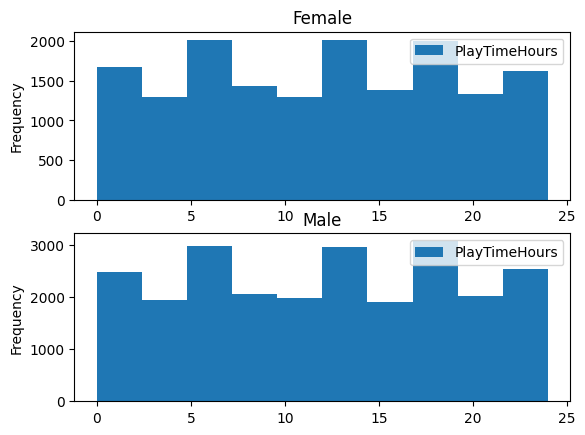

In [ ]:
df.plot.hist(by="Gender", column=["PlayTimeHours"])

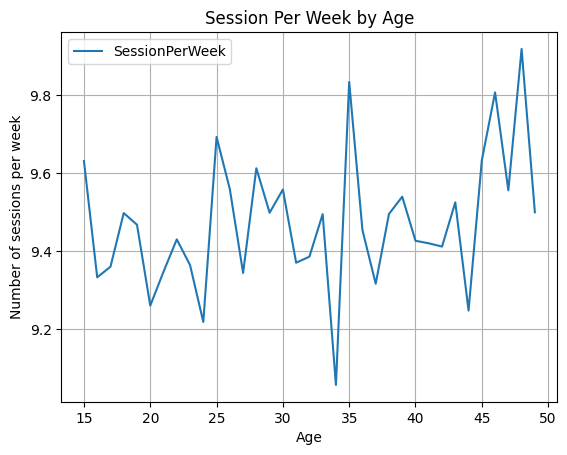

In [ ]:
df_avg_age = df.groupby("Age").mean("SessionPerWeek").reset_index()
plt.plot(df_avg_age["Age"], df_avg_age["SessionsPerWeek"], label="SessionPerWeek")
plt.xlabel("Age")
plt.ylabel("Number of sessions per week")
plt.grid(True)
plt.title("Session Per Week by Age")
plt.legend()
plt.show()

In [ ]:
df_avg_age = df.groupby("Age").mean("SessionPerWeek").reset_index()
plt.plot(df_avg_age["Age"], df_avg_age["SessionsPerWeek"], label="SessionPerWeek")
plt.xlabel("Age")
plt.ylabel("Number of sessions per week")
plt.grid(True)
plt.title("Session Per Week by Age")
plt.legend()
plt.show()

## b) influence of '' type

## c) Seaborn Plots (Pair Plot, Heatmap, Correlation Matrix)

#4) Random Forest